In [5]:
from wordcloud import WordCloud

import pandas as pd

import numpy as np

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import re

from textblob import TextBlob

import seaborn as sns

import matplotlib.pyplot as plt

import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings



In [6]:

df = pd.read_csv('AI_Engineer_Dataset_Task_1.csv')


In [3]:
df.head()


,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree


In [9]:
df


,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...
180964,2021,Spring 2021 - 2022,7040334533,Bachelor,Male,India,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,Do you have any recommendations or suggestions...,User Comment,NaN
180965,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : analyze the relationship between diversi...,Rating,Agree
180966,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The faculty discussed the course syllabus at t...,Rating,Strongly Agree
180967,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The coursework and assignments are challenging,Rating,Strongly Agree


In [7]:
df = df.drop(df[df['QuestionType'] == 'User Comment'].index)
df

,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...
180963,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : apply lessons from diversity and toleran...,Rating,Strongly Agree
180965,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : analyze the relationship between diversi...,Rating,Agree
180966,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The faculty discussed the course syllabus at t...,Rating,Strongly Agree
180967,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The coursework and assignments are challenging,Rating,Strongly Agree


In [8]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ',str(x))
df["ParticipantResponse"] = df["ParticipantResponse"].map(rt)
df["ParticipantResponse"] = df["ParticipantResponse"].str.lower()
df


,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,strongly disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,strongly disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,strongly disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,strongly disagree
...,...,...,...,...,...,...,...,...,...,...,...,...
180963,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : apply lessons from diversity and toleran...,Rating,strongly agree
180965,2021,Spring 2021 - 2022,6724000467,Bachelor,Male,United Arab Emirates,Bachelor of Arts in Security and Strategic Stu...,TOL 200,Tolerance and Diversity,CLO : analyze the relationship between diversi...,Rating,agree
180966,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The faculty discussed the course syllabus at t...,Rating,strongly agree
180967,2022,Fall 2022 - 2023,6373669933,Bachelor,Male,United Kingdom,Bachelor of Business Administration,TOL 200,Tolerance and Diversity,The coursework and assignments are challenging,Rating,strongly agree


In [9]:
constraints = ['RED','BLUE','YELLOW','GREEN','BLACK','WHITE','#23432','#12321','#21232','#ED232','#212FE','#AA232']
def categorical_variable_summary(df,column_name):
    fig= make_subplots(rows = 1, cols =2,
                        specs=[[{'type': 'xy'},{'type':'domain'}]])
    fig.add_trace(go.Bar(y = df[column_name].value_counts().values.tolist(),
                         x = [str(i) for i in df[column_name].value_counts().index],
                         text =df[column_name].value_counts().values.tolist(),
                         name = column_name,
                         textposition = 'auto',
                        showlegend = False,
                         marker = dict(line =dict(color ='white',
                                                 width =1)
                                               )),
                  row =1, col =1)

    fig.add_trace(go.Pie(labels = df[column_name].value_counts().keys(),
                         values =df[column_name].value_counts().values,
                         name = column_name,
                         textposition = 'auto',
                        showlegend = False),             
                row =1, col =2)
    fig.update_layout(title={'text': column_name,
                            'y':0.9,
                            'x':0.5,
                            'xanchor':'center',
                            'yanchor':'top'},
                     template = 'plotly_white')
    iplot(fig)

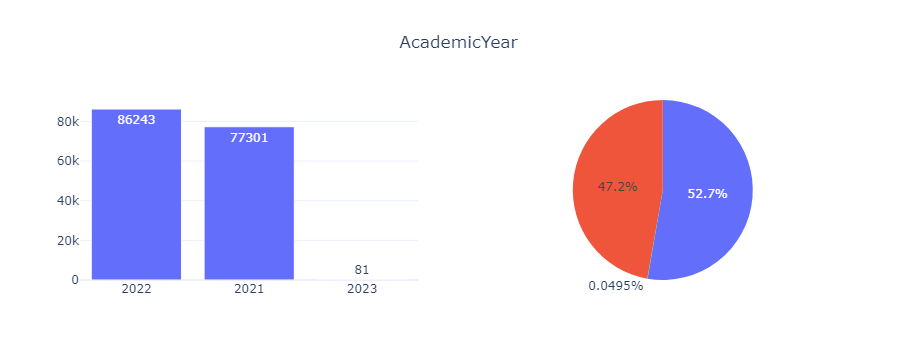

In [108]:
categorical_variable_summary(df, 'AcademicYear')


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None


df[['polarity' , 'subjectivity']] = df['ParticipantResponse'].apply(lambda Text:pd.Series(sentiment_calc(Text)))

for index, row in df['ParticipantResponse'].items():
        score = SentimentIntensityAnalyzer().polarity_scores(row)

        neg = score['neg']
        neu = score['neu']
        pos = score['pos']

        if neg > pos:
            df.loc[index,'sentiment'] = "Negative"
        elif pos > neg:
            df.loc[index, 'sentiment'] = "Positive"
        else:
            df.loc[index, 'sentiment'] = "Neutral"
            

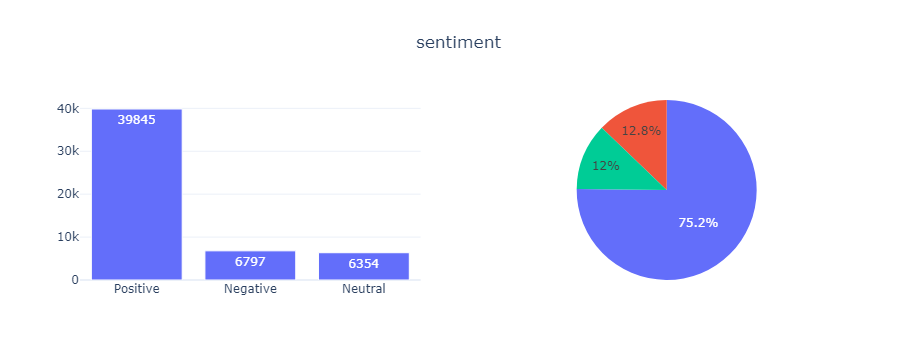

In [12]:
categorical_variable_summary(df, 'sentiment')